**Ejercicio Semana 9**

*Integrantes:*


*   Dilia Maria Luna Melo
*   Yuliana Duarte Quintero



Se implementa un modelo de regresión logistica "one-vs-all" para predecir la enfermedad de las hojas de mango las cuales se tiene 6 enfermedades.

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Directorio donde se encuentran las imágenes
data_dir = "/content/drive/MyDrive/Seguimientos de clase/SEM_9/mango_leaf_disease"

# Lista para almacenar las rutas de las imágenes y sus respectivas etiquetas
imagenes = []
etiquetas = []

# Recorrer las carpetas y leer las imágenes
for clase in os.listdir(data_dir):
    clase_dir = os.path.join(data_dir, clase)
    if os.path.isdir(clase_dir):
        for imagen in os.listdir(clase_dir):
            imagen_path = os.path.join(clase_dir, imagen)
            imagenes.append(imagen_path)
            etiquetas.append(clase)

# Convertir a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Dividir en conjunto de entrenamiento y prueba
train_imagenes, test_imagenes, train_etiquetas, test_etiquetas = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos de datos
print("Número de imágenes de entrenamiento:", len(train_imagenes))
print("Número de imágenes de prueba:", len(test_imagenes))

# Guardar las listas de rutas de imágenes en archivos txt
np.savetxt("train_imagenes.txt", train_imagenes, fmt="%s")
np.savetxt("test_imagenes.txt", test_imagenes, fmt="%s")
np.savetxt("train_etiquetas.txt", train_etiquetas, fmt="%s")
np.savetxt("test_etiquetas.txt", test_etiquetas, fmt="%s")

Número de imágenes de entrenamiento: 3208
Número de imágenes de prueba: 802


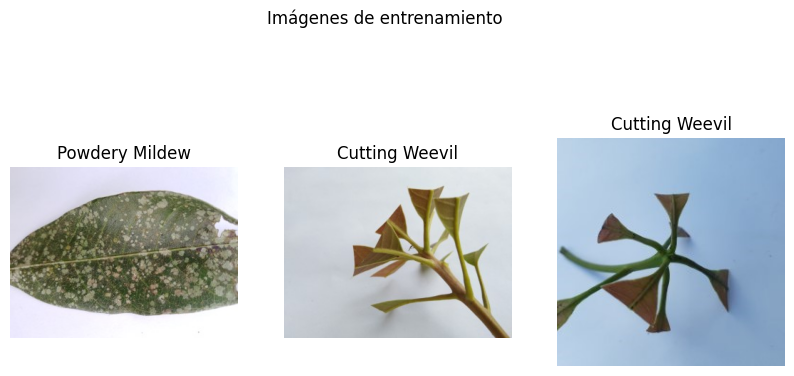

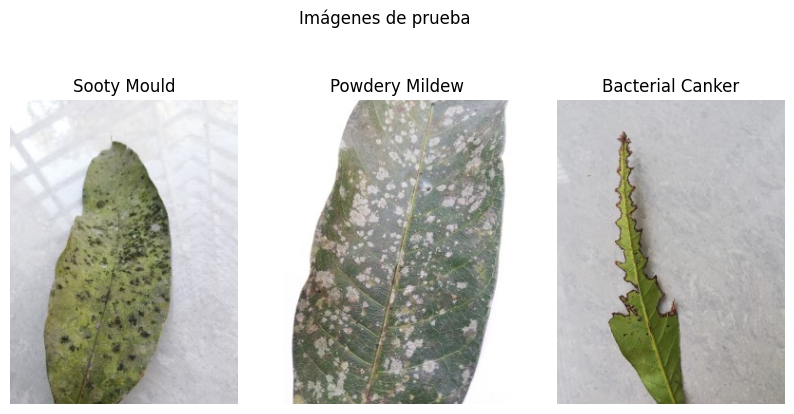

In [6]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Función para mostrar imágenes
def mostrar_imagenes(imagenes, etiquetas, titulo):
    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        idx = random.randint(0, len(imagenes) - 1)
        img = Image.open(imagenes[idx])
        plt.imshow(img)
        plt.title(etiquetas[idx])
        plt.axis('off')
    plt.suptitle(titulo)
    plt.show()

# Mostrar imágenes de entrenamiento
mostrar_imagenes(train_imagenes, train_etiquetas, "Imágenes de entrenamiento")

# Mostrar imágenes de prueba
mostrar_imagenes(test_imagenes, test_etiquetas, "Imágenes de prueba")


In [27]:
from skimage.feature import corner_harris, corner_peaks, canny
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

# Función para extraer características de bordes y esquinas
def extraer_caracteristicas(imagen):
    # Convertir la imagen a escala de grises y redimensionar a un tamaño común
    imagen_gris = rgb2gray(imagen)
    imagen_redimensionada = resize(imagen_gris, (100, 100))

    # Extraer bordes usando el algoritmo Canny
    bordes = canny(imagen_redimensionada)

    # Extraer esquinas utilizando el algoritmo Harris
    esquinas = corner_peaks(corner_harris(imagen_gris), min_distance=5)

    # Calcular la cantidad de bordes y esquinas
    cantidad_bordes = np.sum(bordes)
    cantidad_esquinas = len(esquinas)

    return [cantidad_bordes, cantidad_esquinas]

# Ejemplo de cómo extraer características de una imagen
ejemplo_imagen = Image.open(train_imagenes[0])  # Utilizamos la primera imagen de entrenamiento como ejemplo
caracteristicas_ejemplo = extraer_caracteristicas(ejemplo_imagen)
print("Características de la imagen de ejemplo:", caracteristicas_ejemplo)

Características de la imagen de ejemplo: [562, 320]


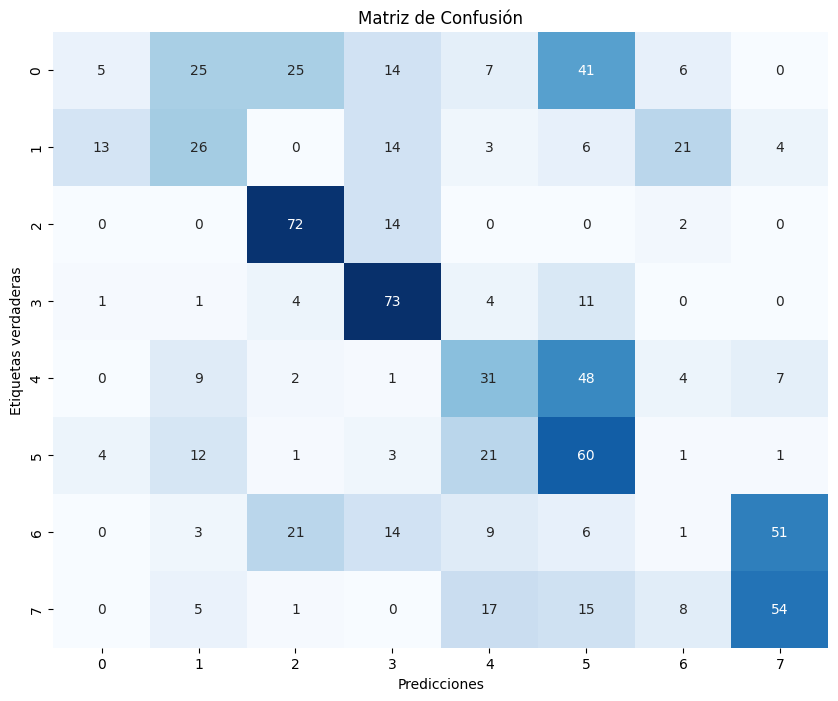

In [28]:
# Directorio donde se encuentran las imágenes
data_dir = "/content/drive/MyDrive/Seguimientos de clase/SEM_9/mango_leaf_disease"

# Lista para almacenar las rutas de las imágenes y sus respectivas etiquetas
imagenes = []
etiquetas = []

# Recorrer las carpetas y leer las imágenes
for clase in os.listdir(data_dir):
    clase_dir = os.path.join(data_dir, clase)
    if os.path.isdir(clase_dir):
        for imagen in os.listdir(clase_dir):
            imagen_path = os.path.join(clase_dir, imagen)
            imagenes.append(imagen_path)
            etiquetas.append(clase)

# Convertir a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Dividir en conjunto de entrenamiento y prueba
train_imagenes, test_imagenes, train_etiquetas, test_etiquetas = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42)

# Lista para almacenar las características de entrenamiento y prueba
X_train = []
X_test = []

# Extraer características de las imágenes de entrenamiento
for imagen_path in train_imagenes:
    imagen = Image.open(imagen_path)
    caracteristicas = extraer_caracteristicas(imagen)
    X_train.append(caracteristicas)

# Extraer características de las imágenes de prueba
for imagen_path in test_imagenes:
    imagen = Image.open(imagen_path)
    caracteristicas = extraer_caracteristicas(imagen)
    X_test.append(caracteristicas)

# Convertir a arrays numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Crear modelo de regresión logística uno contra todos
modelo = LogisticRegression(multi_class='ovr', max_iter=1000)

# Entrenar modelo
modelo.fit(X_train, train_etiquetas)

# Predecir etiquetas para el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(test_etiquetas, predicciones)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [29]:
# Calcular precisión
precision = accuracy_score(test_etiquetas, predicciones)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.4014962593516209


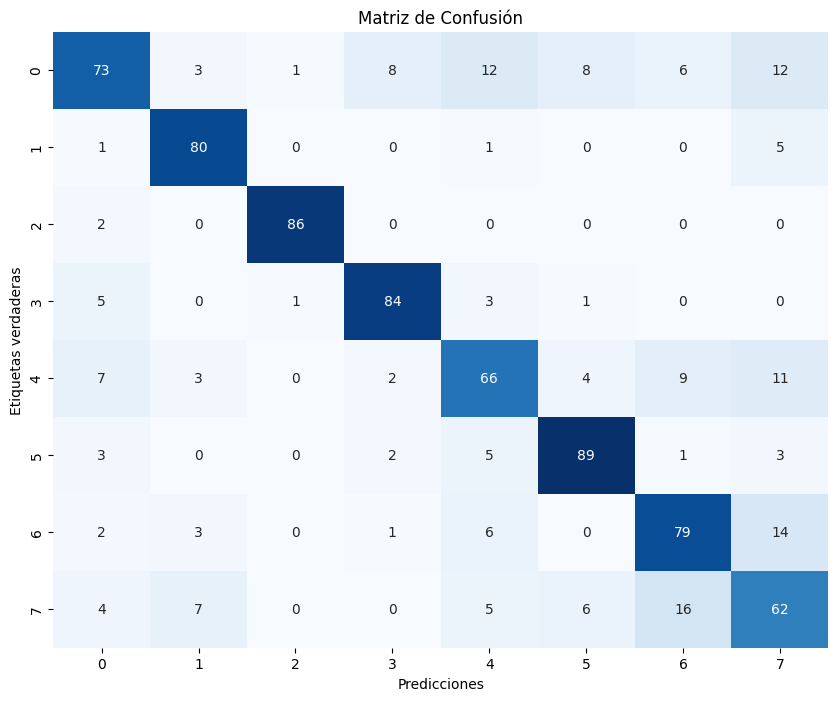

In [25]:
from skimage.feature import hog
from skimage import exposure

# Función para extraer características HOG
def extraer_caracteristicas_hog(imagen):
    # Convertir la imagen a escala de grises y redimensionar a un tamaño común
    imagen_gris = rgb2gray(imagen)
    imagen_redimensionada = resize(imagen_gris, (100, 100))

    # Calcular HOG
    features, hog_image = hog(imagen_redimensionada, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, transform_sqrt=True, block_norm="L2-Hys")

    # Realizar la normalización del histograma de gradiente orientado
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features

# Lista para almacenar las características de entrenamiento y prueba
X_train = []
X_test = []

# Extraer características HOG de las imágenes de entrenamiento
for imagen_path in train_imagenes:
    imagen = Image.open(imagen_path)
    caracteristicas = extraer_caracteristicas_hog(imagen)
    X_train.append(caracteristicas)

# Extraer características HOG de las imágenes de prueba
for imagen_path in test_imagenes:
    imagen = Image.open(imagen_path)
    caracteristicas = extraer_caracteristicas_hog(imagen)
    X_test.append(caracteristicas)

# Convertir a arrays numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Crear modelo de regresión logística uno contra todos
modelo_HOG = LogisticRegression(multi_class = 'ovr', max_iter = 1500)

# Entrenar modelo
modelo_HOG.fit(X_train, train_etiquetas)

# Predecir etiquetas para el conjunto de prueba
predicciones_HOG = modelo_HOG.predict(X_test)

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(test_etiquetas, predicciones_HOG)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()


In [26]:
# Calcular precisión usando la extraccion de caracteristicas HOG
precision = accuracy_score(test_etiquetas, predicciones_HOG)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.7718204488778054


In [33]:
!pip install scikit-image

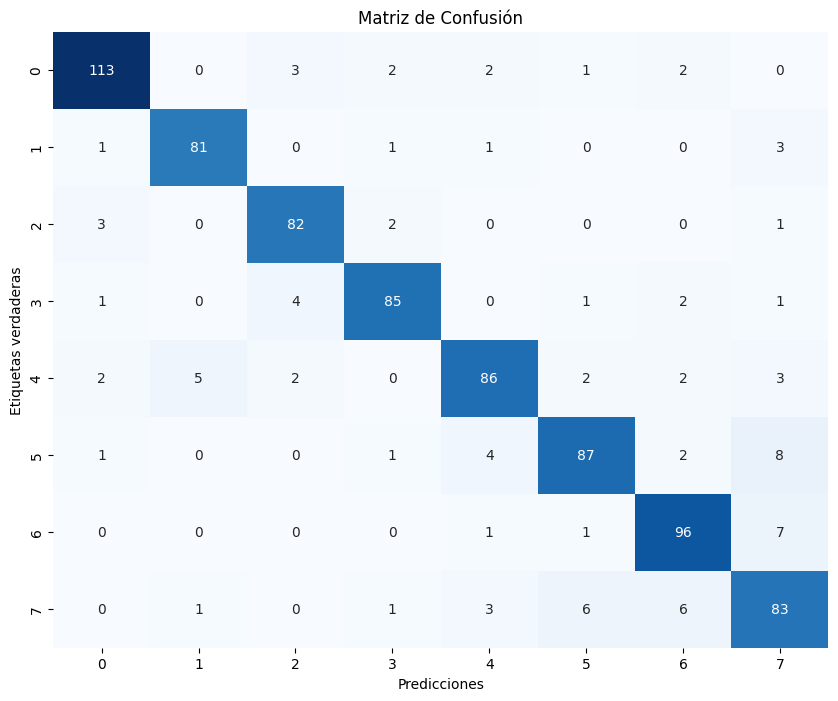

In [35]:
from skimage import io, exposure
from skimage.color import rgb2hsv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

# Función para extraer características con histograma de colores
def extraer_caracteristicas_histograma(imagen):
    # Convertir la imagen a espacio de color HSV
    imagen_hsv = rgb2hsv(imagen)

    # Calcular el histograma de los canales de color
    hist_h, _ = exposure.histogram(imagen_hsv[:, :, 0], nbins=8)
    hist_s, _ = exposure.histogram(imagen_hsv[:, :, 1], nbins=8)
    hist_v, _ = exposure.histogram(imagen_hsv[:, :, 2], nbins=8)

    # Concatenar los histogramas en un solo vector de características
    features = np.concatenate((hist_h, hist_s, hist_v))

    return features

# Directorio donde se encuentran las imágenes
data_dir = "/content/drive/MyDrive/Seguimientos de clase/SEM_9/mango_leaf_disease"

# Lista para almacenar las rutas de las imágenes y sus respectivas etiquetas
imagenes = []
etiquetas = []

# Recorrer las carpetas y leer las imágenes
for clase in os.listdir(data_dir):
    clase_dir = os.path.join(data_dir, clase)
    if os.path.isdir(clase_dir):
        for imagen in os.listdir(clase_dir):
            imagen_path = os.path.join(clase_dir, imagen)
            imagenes.append(imagen_path)
            etiquetas.append(clase)

# Convertir a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Dividir en conjunto de entrenamiento y prueba
train_imagenes, test_imagenes, train_etiquetas, test_etiquetas = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42)

# Lista para almacenar las características de entrenamiento y prueba
X_train = []
X_test = []

# Extraer características de las imágenes de entrenamiento
for imagen_path in train_imagenes:
    imagen = io.imread(imagen_path)
    caracteristicas = extraer_caracteristicas_histograma(imagen)
    X_train.append(caracteristicas)

# Extraer características de las imágenes de prueba
for imagen_path in test_imagenes:
    imagen = io.imread(imagen_path)
    caracteristicas = extraer_caracteristicas_histograma(imagen)
    X_test.append(caracteristicas)

# Convertir a arrays numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Crear modelo de regresión logística uno contra todos
modelo_histograma = LogisticRegression(multi_class='ovr', max_iter=1000)

# Entrenar modelo
modelo_histograma.fit(X_train, train_etiquetas)

# Predecir etiquetas para el conjunto de prueba
predicciones_histograma = modelo_histograma.predict(X_test)

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(test_etiquetas, predicciones_histograma)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [36]:
# Calcular precisión usando la extraccion de caracteristicas HOG
precision = accuracy_score(test_etiquetas, predicciones_histograma)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.8890274314214464


In [39]:
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Función para extraer características con descriptores ORB
def extraer_caracteristicas_orb(imagen):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar puntos clave y descriptores ORB
    puntos_clave, descriptores = orb.detectAndCompute(imagen_gris, None)

    # Verificar si hay descriptores
    if descriptores is None:
        # Si no se encuentran descriptores, se devuelve un array de ceros
        return np.zeros(32)
    else:
        # Completar con ceros si la longitud del descriptor es menor que la esperada
        if len(descriptores) < 32:
            descriptores = np.concatenate((descriptores, np.zeros((32 - len(descriptores), 32), dtype=np.float32)))
        # Seleccionar los primeros 32 descriptores si hay más
        return descriptores[:32].flatten()

# Directorio donde se encuentran las imágenes
data_dir = "/content/drive/MyDrive/Seguimientos de clase/SEM_9/mango_leaf_disease"

# Lista para almacenar las rutas de las imágenes y sus respectivas etiquetas
imagenes = []
etiquetas = []

# Recorrer las carpetas y leer las imágenes
for clase in os.listdir(data_dir):
    clase_dir = os.path.join(data_dir, clase)
    if os.path.isdir(clase_dir):
        for imagen in os.listdir(clase_dir):
            imagen_path = os.path.join(clase_dir, imagen)
            imagenes.append(imagen_path)
            etiquetas.append(clase)

# Convertir a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Dividir en conjunto de entrenamiento y prueba
train_imagenes, test_imagenes, train_etiquetas, test_etiquetas = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42)

# Lista para almacenar las características de entrenamiento y prueba
X_train = []
X_test = []

# Extraer características de las imágenes de entrenamiento
for imagen_path in train_imagenes:
    imagen = cv2.imread(imagen_path)
    caracteristicas = extraer_caracteristicas_orb(imagen)
    X_train.append(caracteristicas)

# Extraer características de las imágenes de prueba
for imagen_path in test_imagenes:
    imagen = cv2.imread(imagen_path)
    caracteristicas = extraer_caracteristicas_orb(imagen)
    X_test.append(caracteristicas)

# Convertir a arrays numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Crear modelo de regresión logística uno contra todos
modelo_orb = LogisticRegression(multi_class='ovr', max_iter=1000)

# Entrenar modelo
modelo_orb.fit(X_train, train_etiquetas)

# Predecir etiquetas para el conjunto de prueba
predicciones_orb = modelo_orb.predict(X_test)

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(test_etiquetas, predicciones_orb)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3208,) + inhomogeneous part.